In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import time
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

C:\Users\Skinny\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
t=time.time()
train_data = np.array(list(np.loadtxt("train3.csv", delimiter=","))).astype("float32")
train_labels = np.array(list(np.loadtxt("train_label.csv", delimiter=","))).astype("float32")
eval_data = np.array(list(np.loadtxt("eval3.csv", delimiter=","))).astype("float32")
eval_labels = np.array(list(np.loadtxt("eval_label.csv", delimiter=","))).astype("float32")
test_data = np.array(list(np.loadtxt("test.csv", delimiter=","))).astype("float32")
test_labels = np.array(list(np.loadtxt("test_label.csv", delimiter=","))).astype("float32")
print(time.time()-t)

218.10883235931396


In [13]:
x_train = train_data.reshape(-1, 24*24*3)
x_val = eval_data.reshape(-1, 24*24*3)

y_train=np.abs(np.reshape(train_labels,(-1,4)))
y_val=np.abs(np.reshape(eval_labels,(-1,4)))

y_max=max(np.max(y_train[:,0]),np.max(y_val[:,0]))  #maximum observed chirality

y_train[:,0]=y_train[:,0]/y_max 
y_val[:,0]=y_val[:,0]/y_max

y_max=max(np.max(y_train[:,1]),np.max(y_val[:,1]))  #maximum observed magnetization

y_train[:,1]=y_train[:,1]/y_max 
y_val[:,1]=y_val[:,1]/y_max

print(np.amax(y_train,axis=0),np.max(y_val,axis=0))
print(np.shape(y_train),np.shape(x_train))

[1.   1.   0.95 1.  ] [0.99684364 0.9997983  0.95       1.        ]
(64000, 4) (64000, 1728)


In [14]:
model = Sequential()
'''
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (24, 24, 2)))

#model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten(input_shape=(24,24,2)))'''
model.add(Dense(512, activation='linear', input_dim=1728))
model.add(LeakyReLU(alpha=.001))
model.add(Dropout(0.25))

model.add(Dense(1024, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(Dropout(0.5))

model.add(Dense(4, activation='sigmoid'))

In [15]:
model.compile(loss='mean_squared_error', optimizer = Adam(lr=1e-4))#, metrics=["accuracy"]) #binary_crossentropy

In [16]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [17]:
hist = model.fit(x=x_train, y=y_train, batch_size=512,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val, y_val), #For speed
                           callbacks=[annealer])

Train on 64000 samples, validate on 16000 samples
Epoch 1/20
 - 3s - loss: 0.0141 - val_loss: 0.0060
Epoch 2/20
 - 2s - loss: 0.0036 - val_loss: 0.0049
Epoch 3/20
 - 2s - loss: 0.0028 - val_loss: 0.0049
Epoch 4/20
 - 2s - loss: 0.0023 - val_loss: 0.0047
Epoch 5/20
 - 2s - loss: 0.0021 - val_loss: 0.0047
Epoch 6/20
 - 2s - loss: 0.0019 - val_loss: 0.0045
Epoch 7/20
 - 2s - loss: 0.0017 - val_loss: 0.0046
Epoch 8/20
 - 2s - loss: 0.0016 - val_loss: 0.0046
Epoch 9/20
 - 2s - loss: 0.0015 - val_loss: 0.0046
Epoch 10/20
 - 2s - loss: 0.0015 - val_loss: 0.0045
Epoch 11/20
 - 2s - loss: 0.0014 - val_loss: 0.0045
Epoch 12/20
 - 2s - loss: 0.0014 - val_loss: 0.0045
Epoch 13/20
 - 2s - loss: 0.0013 - val_loss: 0.0045
Epoch 14/20
 - 2s - loss: 0.0013 - val_loss: 0.0044
Epoch 15/20
 - 2s - loss: 0.0012 - val_loss: 0.0045
Epoch 16/20
 - 2s - loss: 0.0012 - val_loss: 0.0044
Epoch 17/20
 - 2s - loss: 0.0012 - val_loss: 0.0045
Epoch 18/20
 - 2s - loss: 0.0012 - val_loss: 0.0044
Epoch 19/20
 - 2s - los

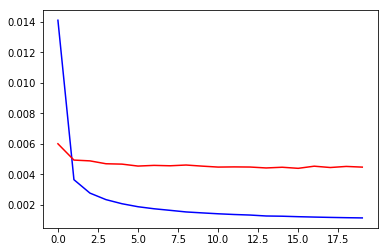

In [18]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()

In [19]:
y_hat = model.predict(x_val)

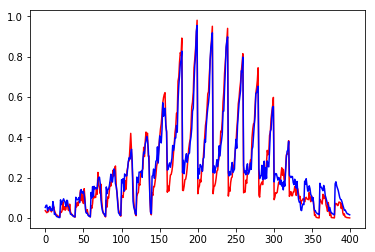

(16000, 4)


In [20]:
h_val=[]
h_hat=[]
for i in range(400):
    h_val.append(np.mean(y_val[i*40:(i+1)*40,0]))
    h_hat.append(np.mean(y_hat[i*40:(i+1)*40,0]))
plt.plot(h_val,'r')
plt.plot(h_hat,'b')
plt.show()
print(np.shape(y_hat))

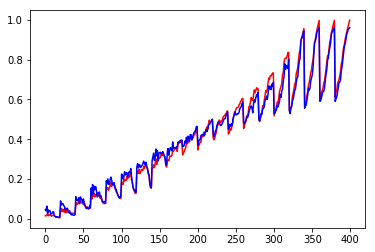

(16000, 4)


In [21]:
h_val=[]
h_hat=[]
for i in range(400):
    h_val.append(np.mean(y_val[i*40:(i+1)*40,1]))
    h_hat.append(np.mean(y_hat[i*40:(i+1)*40,1]))
plt.plot(h_val,'r')
plt.plot(h_hat,'b')
plt.show()
print(np.shape(y_hat))

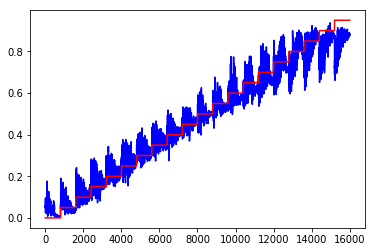

(16000, 4)


In [22]:
plt.plot(y_hat[:,2],'b')
plt.plot(y_val[:,2],'r')
plt.show()
print(np.shape(y_hat))

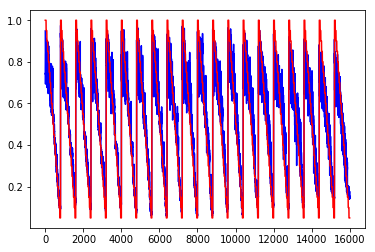

(16000, 4)


In [23]:
plt.plot(y_hat[:,3],'b')
plt.plot(y_val[:,3],'r')
plt.show()
print(np.shape(y_hat))

In [32]:
x_test = test_data.reshape(-1, 24*24*3)
y_test=np.abs(np.reshape(test_labels,(-1,4)))
y_test[:,0]=y_test[:,0]/y_max 
y_test[:,1]=y_test[:,1]/y_max 

y_hat = model.predict(x_test)

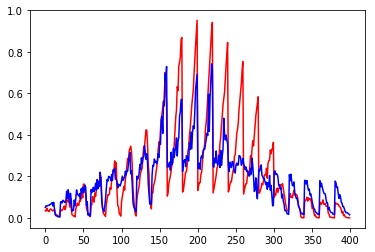

(40000, 4)


In [39]:
h_test=[]
h_hat=[]
for i in range(400):
    h_test.append(np.mean(y_test[i*100:(i+1)*100,0]))
    h_hat.append(np.mean(y_hat[i*100:(i+1)*100,0]))
plt.plot(h_test,'r')
plt.plot(h_hat,'b')
plt.show()
print(np.shape(y_hat))

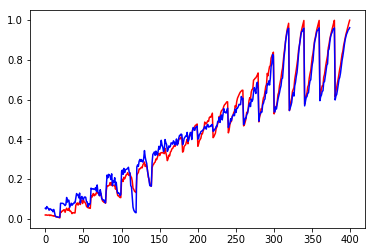

(40000, 4)


In [34]:
h_test=[]
h_hat=[]
for i in range(400):
    h_test.append(np.mean(y_test[i*100:(i+1)*100,1]))
    h_hat.append(np.mean(y_hat[i*100:(i+1)*100,1]))
plt.plot(h_test,'r')
plt.plot(h_hat,'b')
plt.show()
print(np.shape(y_hat))

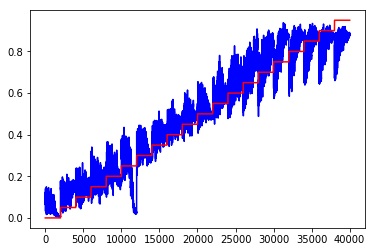

(40000, 4)


In [35]:
plt.plot(y_hat[:,2],'b')
plt.plot(y_test[:,2],'r')
plt.show()
print(np.shape(y_hat))

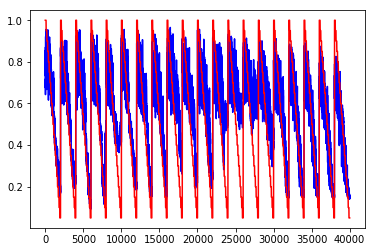

(40000, 4)


In [36]:
plt.plot(y_hat[:,3],'b')
plt.plot(y_test[:,3],'r')
plt.show()
print(np.shape(y_hat))

In [37]:
final_loss = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}".format(final_loss))

Final loss: 0.0045


In [38]:
final_loss = model.evaluate(x_test, y_test, verbose=0)
print("Final loss: {0:.4f}".format(final_loss))

Final loss: 0.0127


In [31]:
print(np.shape(x_test),np.shape(y_test))

(40000, 1728) (40000, 4)
